In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [79]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing = fetch_california_housing()

data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target

df = data.head(4000)




In [80]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
3995,6.2064,29.0,5.780239,0.977853,1471.0,2.505963,34.17,-118.58,3.349
3996,4.2009,7.0,4.843890,1.099714,4404.0,1.799755,34.18,-118.59,2.713
3997,3.8819,19.0,4.755200,1.076000,2372.0,1.897600,34.17,-118.61,3.289
3998,3.0404,32.0,5.037162,1.199324,756.0,2.554054,34.17,-118.62,2.628


In [81]:
X= df.drop('PRICE' , axis=1) 

y= df['PRICE']

In [82]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
3995,6.2064,29.0,5.780239,0.977853,1471.0,2.505963,34.17,-118.58
3996,4.2009,7.0,4.843890,1.099714,4404.0,1.799755,34.18,-118.59
3997,3.8819,19.0,4.755200,1.076000,2372.0,1.897600,34.17,-118.61
3998,3.0404,32.0,5.037162,1.199324,756.0,2.554054,34.17,-118.62


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [84]:
# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Ridge regression model
ridge = Ridge()


In [85]:
# Define the hyperparameter grid
parameters = {'alpha': [0.1, 1.0, 10.0, 40.0, 30.0, 50.0, 80.0, 70.0, 90.0]}

# Perform grid search with cross-validation
grid_cv = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
grid_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_cv.best_params_['alpha']

# Print the best hyperparameter
print(f'Best alpha: {best_alpha}')

Best alpha: 90.0


In [86]:

# Use the best model to make predictions on the test set
best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = best_model.score(X_test, y_test)

print(f'Mean Squared Error on test set: {mse:.2f}')
print(f'R-squared on test set: {r2:.2f}')

Mean Squared Error on test set: 0.28
R-squared on test set: 0.71


c:\Users\Jayraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


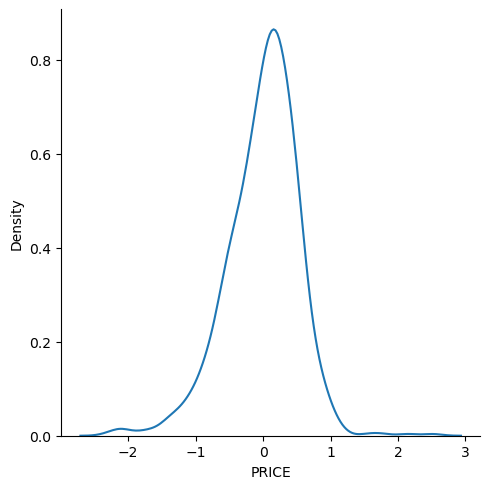

In [88]:
import seaborn as sns  

sns.displot(y_pred-y_test  , kind='kde')